Reinforcement Learning by Q-Learning
===========


In this notebook, we give an introduction to Q-Learning that is a framework to perform reinforcement learning.
## The goals : 
1. An introduction to Q-Learning 
1. An application to train a robot to escape a maze.
1. Code in Python base Numpy and Matplotlib

## Author : Romain Raveaux


# Books 

A reference book is available here : http://incompleteideas.net/book/RLbook2018.pdf

# Reinforcement Learning 

We give some definitions that are mostly taken from (https://en.wikipedia.org/wiki/Reinforcement_learning).

Reinforcement learning (RL) 
1. is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. 
2. is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.
3. differs from $\textbf{supervised learning}$ in that labelled $\textbf{input/output pairs need not be presented}$, and sub-optimal actions need not be explicitly corrected. Instead the focus is finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge)


![texte alt](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Reinforcement_learning_diagram.svg/500px-Reinforcement_learning_diagram.svg.png "toto")

The typical framing of a Reinforcement Learning (RL) scenario: an agent takes actions in an environment, which is interpreted into a reward and a representation of the state, which are fed back into the agent.
The environment is typically formulated as a Markov decision process (MDP)


# Markov decision process

A Markov decision process is a 4-tuple ${\displaystyle (S,A,P,R)}$, where

1. a set of environment and agent states, $S$;
1. a set of actions, $A$, of the agent;
1. $P={\displaystyle \Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)}$ is the probability of transition from state ${\displaystyle s}$ to state ${\displaystyle s'}$ under action ${\displaystyle a}$. $P:  A \times S \to  \mathbb{R}^S $
1. ${\displaystyle R(s,s',a)}$ is the immediate reward after transition from ${\displaystyle s}$ to ${\displaystyle s'}$ with action ${\displaystyle a}$. $R: S \times S \times A \to \mathbb{R}$

![texte alt](https://www.kdnuggets.com/images/reinforcement-learning-fig1-700.jpg "toto")


## Optimization problem with Markov decision process : Finding the best policy $\pi$
The core problem of Markov decision processes is to find a "policy" for the decision maker: a function $\pi$  that specifies the action $a=\pi(s)$ that the decision maker will choose when in state $s$.
In the Markov decision process, we want to maximize the sum of the rewards over all time steps.

$$\pi^*=arg \max_{\pi} \sum_{t=1}^T R(s_t,s^*,\pi(a^*))  $$
$$s^*,a^*=arg \max_{s',a} \Pr(s'\mid s_{t},a)$$

The goal is to choose a policy $\pi$  that will maximize some cumulative function of the random rewards, typically the expected discounted sum over a potentially infinite horizon:

${\displaystyle Ex[\sum _{t=0}^{\infty }{\gamma ^{t}R(a_t,s_{t},s_{t+1})}]}$   (where we choose ${\displaystyle a_{t}=\pi (s_{t})}$, i.e. actions given by the policy). And the expectation is taken over ${\displaystyle s_{t+1}\sim P}({a_{t},s_{t},s_{t+1})}$
where  $\gamma$   is the discount factor satisfying ${\displaystyle 0\leq \ \gamma \ \leq \ 1}$, which is usually close to 1.

## Decision phase
Once a Markov decision process is combined with a policy in this way, this fixes the action for each state and the resulting combination behaves like a Markov chain (since the action chosen in state {\displaystyle s}s is completely determined by $\pi(s)$ and  $\Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)$ reduces to $\Pr(s_{t+1}=s'\mid s_{t}=s)$, a Markov transition matrix).


# Exploration and Exploitation 
One of the challenges that arise in reinforcement learning, and not in other kinds
of learning, is the trade-of between exploration and exploitation. To obtain a lot of
reward, a reinforcement learning agent must prefer actions that it has tried in the past
and found to be e↵ective in producing reward. But to discover such actions, it has to
try actions that it has not selected before. The agent has to exploit what it has already
experienced in order to obtain reward, but it also has to explore in order to make better
action selections in the future.

# Q-learning 

The goal of Q-learning is to learn a policy $\pi(s)$, which tells an agent what action to take under what state.

Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over any and all successive steps, starting from the current state.

"Q" names the function that returns the reward used to provide the reinforcement and can be said to stand for the "quality" of an action taken in a given state.

$$Q: S \times A \to \mathbb{R} $$



Before learning begins, $Q$ is initialized to a possibly arbitrary fixed value (chosen by the programmer). Then, at each time $t$ the agent selects an action $a_{t}$, observes a reward $r_{t}$, enters a new state $s_{t+1}$ (that may depend on both the previous state $s_{t}$ and the selected action), and $Q$ is updated. The core of the algorithm is a simple value iteration update, using the weighted average of the old value and the new information:

${\displaystyle Q^{new}(s_{t},a_{t})\leftarrow (1-\alpha )\cdot \underbrace {Q(s_{t},a_{t})} _{\text{old value}}+\underbrace {\alpha } _{\text{learning rate}}\cdot \overbrace {{\bigg (}\underbrace {r_{t}} _{\text{reward}}+\underbrace {\gamma } _{\text{discount factor}}\cdot \underbrace {\max _{a}Q(s_{t+1},a)} _{\text{estimate of optimal future value}}{\bigg )}} ^{\text{learned value}}}$
where ${\displaystyle r_{t}}$ is the reward received when moving from the state $s_{{t}}$ to the state $s_{t+1}$, and $\alpha$  is the learning rate $0<\alpha \leq 1$).

## Discount factor  $\gamma$
The discount factor $\gamma$  determines the importance of future rewards. A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, i.e. $r_{t}$ (in the update rule above), while a factor approaching 1 will make it strive for a long-term high reward. 

# Exploring the action state space
In the learning phase, the state space of action $a_t$ must be explored. This is achieved by the concerp of exploration and exloitation.

## Exploration and Exploitation 
One of the challenges that arise in reinforcement learning, and not in other kinds
of learning, is the trade-of between exploration and exploitation. To obtain a lot of
reward, a reinforcement learning agent must prefer actions that it has tried in the past
and found to be e↵ective in producing reward. But to discover such actions, it has to
try actions that it has not selected before. The agent has to exploit what it has already
experienced in order to obtain reward, but it also has to explore in order to make better
action selections in the future.

## Epsilon-greedy policy $\pi(s,\epsilon,rnd)$
$\epsilon$ is the probabiliy of exploration. Let $rnd$ be a random number between 0 and 1.
$$\begin{eqnarray}
\epsilon < rnd  \quad& a^*=\pi(s)=random_a \, Q(s,a) &\quad Exploration \\
\epsilon \geq rnd \quad& a^*=\pi(s)= \max_a Q(s,a) & \quad Exploitation \\
\end{eqnarray}$$




# Q-Learning Algorithm

![texte alt](./Qlearningalgoithme.PNG "toto")

# Example to escape the maze

Let us take a simple example. A robot wants to escape a maze.
The maze is a 10x10 matrix for instance. M[x,y] refers to a cell of the matrix. 
Each cell has a value :
1. 1 saying that the cell is the exit of the maze.
1. -1 saying that the cell is a trap. 
1. 0 saying that the cell is normal.

An action can take the following values : $A=\{North (0), South (1), East (2), Weast (3) \}$

The agent can take the following values : $S=\{0,\cdots, 99 \}$. One value corresponds to one location (x,y) of the matrix.
# Start to code
## Let us define some import to manage matrices and plots


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


# Let us define the maze itself

maze.shape= (10, 10)
maze
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Text(0.5,1,'The maze : exit and traps')

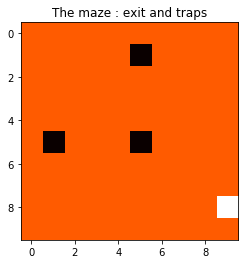

In [2]:
W=10 #the number of columns (the Width)
H=10 #the number of lines (the Height)
maze=np.zeros((H,W))
maze[8,9]=1   #the exit of the maze
maze[5,5]=-1  #a trap
maze[1,5]=-1  #a trap
maze[5,1]=-1  #a trap

#Print the maze
print("maze.shape=",maze.shape)
print("maze\n",maze)

#Plot the maze
plt.figure(1)
plt.imshow(maze,cmap='hot')
plt.title("The maze : exit and traps")


# The maze states. 
Each cell of the matrix  with coordinates (x,y) is a possible state of the agent. So we decided to create a 1D list with a all the states. It will be more convenient later on. Another implementation could be possibe. 


In [3]:
#mazestate is a list where all (x,y) are stored. The order is row major. It means that each line are concatainated.
mazestate=[]
count=0
for y in range(H):
    for x in range(W):
        mazestate.append((x,y))
print("len(mazestate)=",len(mazestate))
print("mazestate\n",mazestate[0:5])



len(mazestate)= 100
mazestate
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]


# Let us create a function to display tha agent in the maze

In [4]:
def MazeWithAgent(maze,x,y,xnew,ynew):
    mazedisplay=maze.copy()
    mazedisplay[y,x]=maze[y,x]
    mazedisplay[ynew,xnew]=3
    return mazedisplay



print(MazeWithAgent(maze,0,0,0,0))
print(MazeWithAgent(maze,0,0,0,1))

[[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# We define the set of action A, the set of agent states S and the Q table.

In [5]:
A = np.array([0,1,2,3])
S =[]
for i in range(0,100):
    S.append(i)
S=np.array(S)
print("S.shape=",S.shape)
print("A.shape=",A.shape)
Q=np.zeros((S.shape[0],A.shape[0]))
print("Q.shape=",Q.shape)



S.shape= (100,)
A.shape= (4,)
Q.shape= (100, 4)


# A define a function that can give the coordonnates (x,y) in function of the state

In [6]:
def getXY(agentstate,mazestate):
    xy=mazestate[agentstate]
    return xy


    
print("xy=",getXY(0,mazestate))
print("xy=",getXY(99,mazestate))
print("xy=",getXY(49,mazestate))
print("xy=",getXY(10,mazestate))
print("xy=",getXY(11,mazestate))

xy= (0, 0)
xy= (9, 9)
xy= (9, 4)
xy= (0, 1)
xy= (1, 1)


# We define a function to display the agent in the from a state

In [7]:
def MazeWithAgentFromState(maze,mazestate,oldstate,newstate):
    x,y=getXY(oldstate,mazestate)
    xnew,ynew=getXY(newstate,mazestate)
    
    mazedisplay=maze.copy()
    mazedisplay[y,x]=maze[y,x]
    mazedisplay[ynew,xnew]=3
    return mazedisplay

print(MazeWithAgentFromState(maze,mazestate,0,0))
print(MazeWithAgentFromState(maze,mazestate,0,10))
print(MazeWithAgentFromState(maze,mazestate,0,88))

[[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.

# Step in the maze
## The function allows to take an action in the maze

In [8]:
def step(action,agentstate,maze,mazestate,stepcounter):
    #get the xy coordonnate from the agent state
    x,y=getXY(agentstate,mazestate)
    # Let's move
    #North
    if action ==0:
        y=y+1
    #South
    if action ==1:
        y=y-1
    #East
    if action ==2:
        x=x+1
    #Weast
    if action ==3:
        x=x-1
    
    flagout=False
    #Control that we do not exceed the maze (out of bound control)
    if x>=maze.shape[1]:
        x=x-1
        flagout=True
        
    if y>=maze.shape[0]:
        y=y-1
        flagout=True
    
    if x<0:
        x=x+1
        flagout=True
    
    if y<0:
        y=y+1
        flagout=True
        
    #We update the state after moving
    # index=y*Width+x
    newagentstate=y*maze.shape[1]+x

    #We get a reward
    reward=maze[y,x]
    
    #if we went out of bounds then we get bad reward
    if flagout==True:
        reward=-1
    
    #We check if we reach the exit of the maze if yes then game is over
    done1= maze[y,x]==1
    #We check if we reach a trap then game is over
    done2= maze[y,x]==-1
    
    #We check if we have moved too much we are maybe looping to inifnity so we stop
    done3=False
    if stepcounter>=100:
            done3=True
            reward=-1
    
    #We check of one the condition to finish the game is true
    done=False
    if done1==True or done2==True or done3==True:
        done=True
        
    return newagentstate,reward,done
    
print(step(0,0,maze,mazestate,0) )
print(step(0,41,maze,mazestate,0) )
print(step(2,88,maze,mazestate,0) )

(10, 0.0, False)
(51, -1.0, True)
(89, 1.0, True)


# Random walk
## Let's move randomly in the maze
## This is equivalent to $\epsilon=1$ in the epsilon greedy policy

1 0 0 False
1 0 0 False
3 0 0 False
3 0 0 False
3 0 0 False
1 0 0 False
2 1 1 False
3 0 0 False
0 10 10 False
1 0 0 False
0 10 10 False
2 11 11 False
3 10 10 False
1 0 0 False
3 0 0 False
2 1 1 False
2 2 2 False
1 2 2 False
1 2 2 False
0 12 12 False
0 22 22 False
0 32 32 False
1 22 22 False
3 21 21 False
0 31 31 False
1 21 21 False
1 11 11 False
2 12 12 False
0 22 22 False
1 12 12 False
2 13 13 False
1 3 3 False
2 4 4 False
0 14 14 False
1 4 4 False
1 4 4 False
2 5 5 False
1 5 5 False
3 4 4 False
2 5 5 False
1 5 5 False
3 4 4 False
1 4 4 False
0 14 14 False
3 13 13 False
0 23 23 False
0 33 33 False
2 34 34 False
1 24 24 False
1 14 14 False
0 24 24 False
1 14 14 False
0 24 24 False
1 14 14 False
1 4 4 False
1 4 4 False
3 3 3 False
3 2 2 False
0 12 12 False
2 13 13 False
0 23 23 False
0 33 33 False
0 43 43 False
0 53 53 False
1 43 43 False
1 33 33 False
0 43 43 False
3 42 42 False
1 32 32 False
1 22 22 False
2 23 23 False
1 13 13 False
0 23 23 False
2 24 24 False
1 14 14 False
3 13 13 Fa

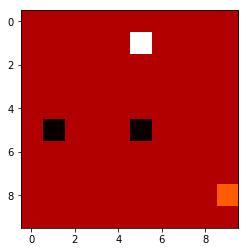

In [9]:
fig = plt.figure() # just for display

state=0 #initial state of the agent
done=False
listimages=[] # just for display : store images
stepcounter=0
while done != True: # Move until we reach the exit or a trap
    action = np.random.choice(A) # Choose a random action
    newtstate,reward,end=step(action,state,maze,mazestate,stepcounter) # Move according to the move
    state=newtstate # update state
    done=end # update are we done or not ? 
    stepcounter=stepcounter+1
    print(action,state,newtstate,end) # print
    mat=MazeWithAgentFromState(maze,mazestate,state,newtstate) # display maze and agent
    im = plt.imshow(mat, animated=True,cmap='hot') # display maze and agent
    listimages.append([im]) # display maze and agent
    


#  Let's animate

In [10]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(fig, listimages, interval=200, blit=True,
                                repeat_delay=100)


ani.save('RandomMaze.mp4')

plt.show()
HTML(ani.to_html5_video())


# Time to learn how to move in the maze

# Code : Q-Learning 

 


# $\epsilon$-greeedy policy

In [11]:
# Choose an action from the espilon greedy policy
def ChooseActionFromPolicy(A,epsilon,Q,state):
    rnd=np.random.random()
    action=-1
    if rnd<epsilon:
        action = np.random.choice(A)
    else:
        action = Q[state,:].argmax()

    return action


# Update de Q Table

In [12]:
# Update the Q table (see equation above
def UpdateQ(state,action,newstate,reward,alpha,gamma):
    firstterm=(1-alpha)*Q[state,action]
    secondterm=gamma*Q[newstate,:].max()
    thirdterm=alpha*(reward+secondterm)
    res=firstterm+thirdterm
    Q[state,action]=res

# Play One Game and learning the Q table

t= 0 epsilon= 0.3
t= 1 epsilon= 0.3
t= 2 epsilon= 0.3
t= 3 epsilon= 0.3
t= 4 epsilon= 0.3
t= 5 epsilon= 0.3
t= 6 epsilon= 0.3
t= 7 epsilon= 0.3
t= 8 epsilon= 0.3
t= 9 epsilon= 0.3
t= 10 epsilon= 0.3
t= 11 epsilon= 0.3
t= 12 epsilon= 0.3
t= 13 epsilon= 0.3
t= 14 epsilon= 0.3
t= 15 epsilon= 0.3
t= 16 epsilon= 0.3
t= 17 epsilon= 0.3
t= 18 epsilon= 0.3
t= 19 epsilon= 0.3
t= 20 epsilon= 0.3
t= 21 epsilon= 0.3
t= 22 epsilon= 0.3
t= 23 epsilon= 0.3
t= 24 epsilon= 0.3
t= 25 epsilon= 0.3
t= 26 epsilon= 0.3
t= 27 epsilon= 0.3
t= 28 epsilon= 0.3
t= 29 epsilon= 0.3
t= 30 epsilon= 0.3
t= 31 epsilon= 0.3
t= 32 epsilon= 0.3
t= 33 epsilon= 0.3
t= 34 epsilon= 0.3
t= 35 epsilon= 0.3
t= 36 epsilon= 0.3
t= 37 epsilon= 0.3
t= 38 epsilon= 0.3
t= 39 epsilon= 0.3
Fin du QLearning !!!
Let's try to reach the exit door with what we have learned
t= 9999 epsilon= 0


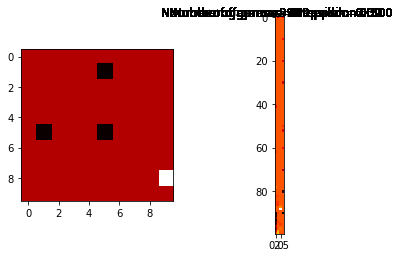

In [17]:

# Let's play one game
def OneGameLearning(A,Q,maze,mazestate,epsilon,alpha,gamma,listimages,t):
    state=0 #initial state
    done = False
    stepcounter=0
    while done != True : # Move until we reach the exit or a trap or the number of moves exceed
        
        action = ChooseActionFromPolicy(A,epsilon,Q,state) #choose an action
        newstate,reward,end=step(action,state,maze,mazestate,stepcounter) #move according to the policy

        #display the maze and the Q table
        mat=MazeWithAgentFromState(maze,mazestate,state,newstate)
        ttl = plt.text(0.5, 1.01, "Number of games="+str(t)+" epsilon="+"{:.2f}".format(epsilon), horizontalalignment='center', verticalalignment='bottom', fontsize="large")
        im1 = axarr[0].imshow(mat, animated=True,cmap='hot')
        im2 = axarr[1].imshow(Q, animated=True,cmap='hot')
        listimages.append([ttl,im1,im2])
        #end of display
        
        #Update Q
        UpdateQ(state,action,newstate,reward,alpha,gamma)
        
        #Update state of the agent
        state=newstate
        #Update state of the game
        done=end
        stepcounter=stepcounter+1
        
        
####################
# Q learning runnning
####################

#Let's initialize the Q Table
Q=np.zeros((S.shape[0],A.shape[0]))
#Let's define some hyper parameters
alpha=0.1 #learing rate
gamma=0.5 #Discount factor

epsilonvalue=0.3 #probability of exploration we want to get at the end

nbgames=40 # The number of trials, number of games

f, axarr = plt.subplots(1,2)
listimages=[] # Just for the animation

for t in range(nbgames):
    
    epsilon=epsilonvalue
    
    # run one game
    OneGameLearning(A,Q,maze,mazestate,epsilon,alpha,gamma,listimages,t)    
    print("t=",t, "epsilon=",epsilon)
    
print("Fin du QLearning !!!")

print("Let's try to reach the exit door with what we have learned")
epsilon=0
OneGameLearning(A,Q,maze,mazestate,epsilon,alpha,gamma,listimages,9999)    
OneGameLearning(A,Q,maze,mazestate,epsilon,alpha,gamma,listimages,9999)    

print("t=",9999, "epsilon=",epsilon)

In [18]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(f, listimages, interval=100, blit=True,
                                repeat_delay=100)


ani.save('QlearningMaze.mp4')

plt.show()


In [19]:
HTML(ani.to_html5_video())


In [ ]:
#Waste

#epsilon=epsilon0*(1/(1+decay*t)) #epsilon decay
#if(epsilon<=epsilonvalue):  #if epsilon is < to some value then we set it 
#    epsilon=epsilonvalue

#epsilon0=1
#decay=1

#epsilon=(1/(1+1*t)) #epsilon decay
    #if(epsilon<=epsilonvalue):  #if epsilon is < to some value then we set it 
    #    epsilon=epsilonvalue

# We start with a high epsilon at the begin to explore and after some iteration with reduce the exploration
# to do more exploitation until we reach the probability of exploration 

